In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import cv2
import tqdm as tqdm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/xla_BTL/Leaves_fix-20230719T150141Z-001.zip

Archive:  /content/drive/MyDrive/xla_BTL/Leaves_fix-20230719T150141Z-001.zip
replace Leaves_fix/23/3062.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

liệt kê tất cả các file trong Logo Branch

In [ ]:
root_dir = "/content/Leaves_fix"
os.listdir(root_dir)

['29',
 '30',
 '5',
 '3',
 '9',
 '10',
 '15',
 '1',
 '31',
 '27',
 '21',
 '24',
 '13',
 '20',
 '7',
 '22',
 '18',
 '4',
 '25',
 '26',
 '23',
 '19',
 '14',
 '6',
 '12',
 '16',
 '2',
 '8',
 '17',
 '32',
 '28',
 '11']

hàm tiền xử lý ảnh, đưa tất cả các ảnh cung về một kích thước là 224x224

In [ ]:
# hàm tiền xử lý ảnh
from PIL import Image
def resize_images(input_folder, output_folder, size):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get the list of files in the input folder
    files = os.listdir(input_folder)

    for file_name in files:
        # Generate the full path of the input and output files
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, file_name)

        # Open the image using PIL
        image = Image.open(input_path)
        if image.mode != 'RGB':
          image = image.convert('RGB')

        # Resize the image
        resized_image = image.resize(size)

        # Save the resized image to the output folder
        resized_image.save(output_path)
size = (224, 224)
# Example usage
for input_foder in os.listdir(root_dir):
    input="F:/AI/AI_lam_lai/Logo Branch/" + input_foder
    resize_images(input, input, size)

liệt kê tất cả các đường link cỏ trong mục folder gốc

In [ ]:
lenght=0;
for input_folder in os.listdir(root_dir):
    lenght = lenght+1;
    input_folder="/content/Leaves_fix"+input_folder
    print(input_folder)
print(lenght)

/content/Leaves_fix29
/content/Leaves_fix30
/content/Leaves_fix5
/content/Leaves_fix3
/content/Leaves_fix9
/content/Leaves_fix10
/content/Leaves_fix15
/content/Leaves_fix1
/content/Leaves_fix31
/content/Leaves_fix27
/content/Leaves_fix21
/content/Leaves_fix24
/content/Leaves_fix13
/content/Leaves_fix20
/content/Leaves_fix7
/content/Leaves_fix22
/content/Leaves_fix18
/content/Leaves_fix4
/content/Leaves_fix25
/content/Leaves_fix26
/content/Leaves_fix23
/content/Leaves_fix19
/content/Leaves_fix14
/content/Leaves_fix6
/content/Leaves_fix12
/content/Leaves_fix16
/content/Leaves_fix2
/content/Leaves_fix8
/content/Leaves_fix17
/content/Leaves_fix32
/content/Leaves_fix28
/content/Leaves_fix11
32


gán đường link vào các thực thể cụ thể có trong bài

In [ ]:

a1="/content/Leaves_fix/1"
a2="/content/Leaves_fix/2"
a3="/content/Leaves_fix/3"
a4 ="/content/Leaves_fix/4"
a5="/content/Leaves_fix/5"
a6="/content/Leaves_fix/6"
a7="/content/Leaves_fix/7"
a8="/content/Leaves_fix/8"
a9="/content/Leaves_fix/9"
a10="/content/Leaves_fix/10"
a11="/content/Leaves_fix/11"
a12="/content/Leaves_fix/12"
a13="/content/Leaves_fix/13"
a14="/content/Leaves_fix/14"
a15="/content/Leaves_fix/15"
a16="/content/Leaves_fix/16"
a17="/content/Leaves_fix/17"
a18="/content/Leaves_fix/18"
a19="/content/Leaves_fix/19"
a20="/content/Leaves_fix/20"
a21="/content/Leaves_fix/21"
a22="/content/Leaves_fix/22"
a23="/content/Leaves_fix/23"
a24="/content/Leaves_fix/24"
a25="/content/Leaves_fix/25"
a26="/content/Leaves_fix/26"
a27="/content/Leaves_fix/27"
a28="/content/Leaves_fix/28"
a29="/content/Leaves_fix/29"
a30="/content/Leaves_fix/30"
a31="/content/Leaves_fix/31"
a32="/content/Leaves_fix/32"



in ra các folder con có bao nhiêu ảnh bên trong đó

In [ ]:
print("Number of Images in Each Directory:")
print(f"1:{len(os.listdir(a1))}")
print(f"2:{len(os.listdir(a2))}")
print(f"3:{len(os.listdir(a3))}")
print(f"4:{len(os.listdir(a4))}")
print(f"5:{len(os.listdir(a5))}")
print(f"6:{len(os.listdir(a6))}")
print(f"7:{len(os.listdir(a7))}")
print(f"8:{len(os.listdir(a8))}")
print(f"9:{len(os.listdir(a9))}")
print(f"10:{len(os.listdir(a10))}")
print(f"11:{len(os.listdir(a11))}")
print(f"12:{len(os.listdir(a12))}")
print(f"13:{len(os.listdir(a13))}")
print(f"14:{len(os.listdir(a14))}")
print(f"15:{len(os.listdir(a15))}")
print(f"16:{len(os.listdir(a16))}")
print(f"17:{len(os.listdir(a17))}")
print(f"18:{len(os.listdir(a18))}")
print(f"19:{len(os.listdir(a19))}")
print(f"20:{len(os.listdir(a20))}")
print(f"21:{len(os.listdir(a21))}")
print(f"22:{len(os.listdir(a22))}")
print(f"23:{len(os.listdir(a23))}")
print(f"24:{len(os.listdir(a24))}")
print(f"25:{len(os.listdir(a25))}")
print(f"26:{len(os.listdir(a26))}")
print(f"27:{len(os.listdir(a27))}")
print(f"28:{len(os.listdir(a28))}")
print(f"29:{len(os.listdir(a29))}")
print(f"30:{len(os.listdir(a30))}")
print(f"31:{len(os.listdir(a31))}")





Number of Images in Each Directory:
1:59
2:63
3:72
4:73
5:56
6:62
7:52
8:59
9:55
10:65
11:50
12:63
13:52
14:65
15:60
16:56
17:77
18:62
19:61
20:66
21:60
22:55
23:55
24:65
25:54
26:52
27:53
28:55
29:57
30:64
31:53


Đoạn code trên có chức năng tạo một dataset từ các hình ảnh trong một thư mục cụ thể.

Các biến và danh sách được sử dụng trong đoạn code:

x: Danh sách rỗng để lưu trữ các hình ảnh sau khi được xử lý.
y: Danh sách rỗng để lưu trữ nhãn của các hình ảnh tương ứng.
dataset: Danh sách rỗng, có thể không được sử dụng trong đoạn code này.
create_dataset(directory, dir_name): Hàm này nhận vào hai tham số là directory (đường dẫn tới thư mục chứa các hình ảnh) và dir_name (tên của thư mục), và trả về danh sách x và y sau khi đã xử lý.
Cách thức hoạt động của đoạn code:

Vòng lặp for duyệt qua tất cả các tệp tin trong thư mục directory.
Đối với mỗi tệp tin, đoạn code kiểm tra xem có thể đọc được hình ảnh từ tệp tin đó hay không. Nếu không thể đọc được, đoạn code bỏ qua tệp tin đó và tiếp tục với tệp tin tiếp theo.
Nếu đọc được hình ảnh từ tệp tin, đoạn code thực hiện các bước sau:
Đọc hình ảnh từ tệp tin sử dụng cv2.imread().
Thay đổi kích thước của hình ảnh thành (150, 150) bằng cách sử dụng cv2.resize().
Thêm hình ảnh đã xử lý vào danh sách x.
Thêm nhãn dir_name vào danh sách y.
Cuối cùng, đoạn code trả về danh sách x và y.

In [ ]:
x = []
y = []
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

In [ ]:
x,y= create_dataset(a1,"1")
x,y= create_dataset(a2,"2")
x,y= create_dataset(a3,"3")
x,y= create_dataset(a4,"4")
x,y= create_dataset(a5,"5")
x,y= create_dataset(a6,"6")
x,y= create_dataset(a7,"7")
x,y= create_dataset(a8,"8")
x,y= create_dataset(a9,"9")
x,y= create_dataset(a10,"10")
x,y= create_dataset(a11,"11")
x,y= create_dataset(a12,"12")
x,y= create_dataset(a13,"13")
x,y= create_dataset(a14,"14")
x,y= create_dataset(a15,"15")
x,y= create_dataset(a16,"16")
x,y= create_dataset(a17,"17")
x,y= create_dataset(a18,"18")
x,y= create_dataset(a19,"19")
x,y= create_dataset(a20,"20")
x,y= create_dataset(a20,"21")
x,y= create_dataset(a20,"22")
x,y= create_dataset(a20,"23")
x,y= create_dataset(a20,"24")
x,y= create_dataset(a20,"25")
x,y= create_dataset(a20,"26")
x,y= create_dataset(a20,"27")
x,y= create_dataset(a20,"28")
x,y= create_dataset(a20,"29")
x,y= create_dataset(a20,"30")
x,y= create_dataset(a20,"31")
x,y= create_dataset(a20,"32")



100%|██████████| 66/66 [00:00<00:00, 733.09it/s]


Đoạn code trên có nghĩa là:

x = np.array(x): Biến x được chuyển đổi thành một mảng numpy bằng cách sử dụng hàm np.array(). Điều này giúp chuyển đổi đối tượng x thành một mảng nhiều chiều để có thể sử dụng các phép toán và tính toán trên mảng này.

y = np.array(y): Tương tự như trên, biến y cũng được chuyển đổi thành một mảng numpy.

x.shape, y.shape: Đây là cách để lấy kích thước (số hàng, số cột) của mảng x và y. Kết quả trả về là một tuple gồm hai giá trị: (số hàng, số cột).

In [ ]:
x =  np.array(x)
y = np.array(y)
x.shape,y.shape

((2020, 150, 150, 3), (2020,))

Tạo một đối tượng hình vẽ (figure) với kích thước 12x7 inch.
Lặp qua 15 lần:
Chọn ngẫu nhiên một mẫu từ danh sách x.
Gán ảnh tương ứng với mẫu đã chọn vào biến image.
Gán nhãn (category) tương ứng với mẫu đã chọn vào biến category.
Vẽ một subplot có chỉ số i+1 trong lưới 3x5 (3 hàng, 5 cột).
Điều chỉnh khoảng cách giữa các subplot theo chiều dọc.
Hiển thị ảnh trong subplot.
Đặt nhãn (label) cho trục x của subplot là category.
Tăng tính gắn kết giữa các subplot bằng cách sử dụng plt.tight_layout().
Hiển thị hình vẽ.

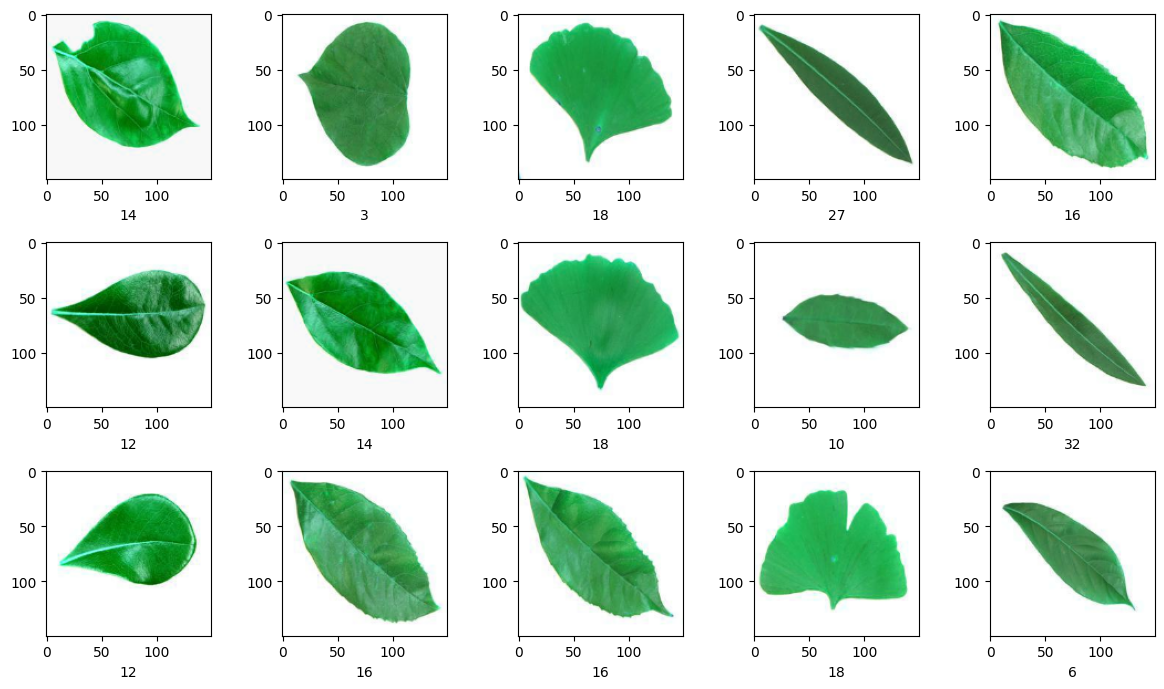

In [ ]:
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(x)))
    image = x[sample]
    category = y[sample]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)

plt.tight_layout()
plt.show()

Import module LabelEncoder từ sklearn.preprocessing.
Tạo một đối tượng LabelEncoder và gán vào biến le.
Sử dụng phương thức fit_transform() của LabelEncoder để chuyển đổi danh sách y thành các giá trị số.
Gán kết quả chuyển đổi vào biến y.
In ra giá trị của biến y sau khi chuyển đổi.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[ 0  0  0 ... 25 25 25]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# fit_transform: Fit label binarizer/transform multi-class labels to binary labels.
# The output of transform is sometimes referred to as the 1-of-K coding scheme.
y = le.fit_transform(y)
print(y)

[ 0  0  0 ... 25 25 25]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Đoạn code trên có ý nghĩa như sau:

img_size = 150: Đặt kích thước ảnh (chiều dài và chiều rộng) thành 150 pixel.

x_train = np.array(x_train)/255.0 và x_test = np.array(x_test)/255.0: Chia giá trị của các pixel trong tập huấn luyện (x_train) và tập kiểm tra (x_test) cho 255.0 để chuẩn hóa giá trị pixel về khoảng từ 0 đến 1. Điều này giúp cải thiện hiệu suất của mô hình.

x_train = x_train.reshape(-1,img_size,img_size,3): Thay đổi hình dạng của tập huấn luyện thành một mảng 4 chiều, với kích thước là (-1, img_size, img_size, 3). Trong đó:

-1 tự động tính toán số lượng mẫu huấn luyện dựa trên kích thước của mảng.
img_size là kích thước ảnh đã được định nghĩa trước đó.
3 là số kênh màu RGB của ảnh.
y_train = np.array(y_train): Chuyển đổi tập nhãn huấn luyện (y_train) thành một mảng numpy.

x_test = x_test.reshape(-1,img_size,img_size,3): Thực hiện thao tác tương tự như bước 3 cho tập kiểm tra (x_test).

y_test = np.array(y_test): Chuyển đổi tập nhãn kiểm tra (y_test) thành một mảng numpy.

Tổng quan, đoạn code này chuẩn hóa giá trị pixel của ảnh và thay đổi hình dạng của các mảng dữ liệu để phù hợp với đầu vào của mô hình huấn luyện.

In [ ]:
img_size =150

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)

In [ ]:
y_train_lb.shape,y_test_lb.shape

((1616, 32), (404, 32))

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
for layer in vgg.layers:
  print(layer.name,layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model =Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(32,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                262176    
                                                                 
Total params: 14,976,864
Trainable params: 262,176
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg16.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)


In [ ]:
unique,counts = np.unique(y_train_lb,return_counts=True)
print(unique,counts)

[0 1] [50096  1616]


In [ ]:
batch_size=32
history =  model.fit(x_train,y_train_lb,epochs=15,validation_data=(x_test,y_test_lb),
                     batch_size=32 ,verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/15
51/51 [==============================] - ETA: 0s - loss: 1.8295 - accuracy: 0.4790
Epoch 1: val_accuracy improved from -inf to 0.59901, saving model to vgg16.h5
51/51 [==============================] - 598s 12s/step - loss: 1.8295 - accuracy: 0.4790 - val_loss: 1.3072 - val_accuracy: 0.5990
Epoch 2/15
51/51 [==============================] - ETA: 0s - loss: 1.2694 - accuracy: 0.5941
Epoch 2: val_accuracy did not improve from 0.59901
51/51 [==============================] - 585s 12s/step - loss: 1.2694 - accuracy: 0.5941 - val_loss: 1.3099 - val_accuracy: 0.5792
Epoch 3/15
51/51 [==============================] - ETA: 0s - loss: 1.2633 - accuracy: 0.6058
Epoch 3: val_accuracy did not improve from 0.59901
51/51 [==============================] - 586s 12s/step - loss: 1.2633 - accuracy: 0.6058 - val_loss: 1.2697 - val_accuracy: 0.5767
Epoch 4/15
51/51 [==============================] - ETA: 0s - loss: 1.2524 - accuracy: 0.5953
Epoch 4: val_accuracy did not improve from 0.59901


Đoạn code này có nghĩa là bạn đang đánh giá mô hình (model) của mình trên tập dữ liệu kiểm tra (x_test, y_test_lb).

Hàm model.evaluate(x_test, y_test_lb) được sử dụng để tính toán loss và accuracy của mô hình trên tập dữ liệu kiểm tra. Kết quả của hàm này được gán vào hai biến loss và accuracy.

Dòng tiếp theo print(f"Loss: {loss}") được sử dụng để in ra giá trị của loss.

Dòng cuối cùng print(f"Accuracy: {accuracy}") được sử dụng để in ra giá trị của accuracy.

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test_lb)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

13/13 [==============================] - 109s 8s/step - loss: 1.5344 - accuracy: 0.5693
Loss: 1.5343806743621826
Accuracy: 0.5693069100379944


Câu lệnh y_pred = np.argmax(model.predict(x_test), axis=1) có nghĩa là bạn đang dự đoán nhãn (label) cho các mẫu trong tập dữ liệu kiểm tra (x_test) bằng cách sử dụng mô hình (model) đã được huấn luyện.

Trước tiên, model.predict(x_test) được sử dụng để dự đoán xác suất của các lớp cho từng mẫu trong x_test. Kết quả trả về là một ma trận có kích thước (số mẫu trong x_test, số lớp), trong đó mỗi phần tử đại diện cho xác suất của mỗi lớp cho mỗi mẫu.

Sau đó, np.argmax(..., axis=1) được sử dụng để chọn ra chỉ số của lớp có xác suất cao nhất cho mỗi mẫu. Kết quả trả về là một mảng 1 chiều (y_pred) chứa các chỉ số của lớp được dự đoán cho từng mẫu trong x_test.

Tóm lại, câu lệnh này giúp bạn dự đoán nhãn cho các mẫu trong tập dữ liệu kiểm tra bằng cách sử dụng mô hình và lưu kết quả vào biến y_pred.

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

13/13 [==============================] - 110s 8s/step


In [ ]:
y_pred[:15]

array([31, 30, 29, 25, 12, 30,  9,  5,  1,  8, 25, 12, 25, 12, 12])

In [ ]:
y_pred

array([31, 30, 29, 25, 12, 30,  9,  5,  1,  8, 25, 12, 25, 12, 12, 25, 12,
       22,  2, 25, 29, 29, 25,  3, 12, 12,  1, 12, 10, 10, 12, 12,  0, 31,
       30,  9,  1,  0, 12, 31, 10, 26, 11, 12,  7, 27, 12,  7, 12, 12, 12,
       25, 25,  7, 25, 12, 11, 27,  9, 29, 11,  4,  8, 25, 12,  8, 12, 12,
       11, 28, 10,  6,  9,  1,  7, 25, 30, 25,  4, 25, 12, 31, 25, 25,  8,
       11,  4,  1, 12, 25, 25, 25,  1,  1,  1, 25,  3, 12, 25,  9,  3, 30,
       31, 12, 25,  6, 12, 22, 25, 12, 31,  6,  7, 28,  1, 12, 26, 12,  9,
       30, 28,  5, 25,  9, 25, 12, 27, 25, 31, 10,  3, 26, 26,  1, 25, 12,
        6, 12,  5,  5,  9, 28, 12, 10, 25, 27, 30, 25,  7, 25, 25, 10, 25,
       25,  5, 31, 12, 25,  5, 25, 29, 22, 12, 28, 27, 29, 26, 29, 10, 11,
       12, 12,  1, 26, 25, 29, 10, 26, 12, 12,  5, 25, 28, 25,  1, 28,  4,
       27, 12, 31, 12, 25, 10, 12, 26, 28, 28,  1, 25,  3, 12, 25,  0, 26,
       25, 12, 12,  2, 10, 12, 22, 27, 29, 26, 26, 25, 25,  9,  0,  8, 11,
       25, 22,  3,  8, 25

Đoạn code trên sử dụng thư viện sklearn.metrics để tính toán và hiển thị báo cáo phân loại (classification report) giữa hai tập dữ liệu y_test và y_pred.

Trong đó:

y_test là tập dữ liệu chứa nhãn thực tế của các mẫu.
y_pred là tập dữ liệu chứa nhãn được dự đoán bởi mô hình.
Báo cáo phân loại cung cấp thông tin chi tiết về hiệu suất của mô hình phân loại, bao gồm các chỉ số như precision (độ chính xác), recall (độ phục hồi), f1-score (điểm F1), và support (số lượng mẫu trong từng nhãn). Báo cáo này giúp đánh giá hiệu suất của mô hình và đưa ra thông tin về khả năng phân loại của nó trên từng nhãn cụ thể.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        19
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         9
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         8
           7       0.93      1.00      0.97        14
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        12
          11       1.00      0.93      0.97        15
          12       0.01      0.14      0.02         7
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        17
          16       0.00      0.00      0.00        15
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Đoạn code trên sử dụng hai thư viện sklearn.metrics và mlxtend.plotting để tính toán ma trận nhầm lẫn (confusion matrix) và hiển thị biểu đồ ma trận nhầm lẫn.

Cụ thể:

Dòng from sklearn.metrics import confusion_matrix import hàm confusion_matrix từ thư viện sklearn.metrics. Hàm này được sử dụng để tính toán ma trận nhầm lẫn dựa trên các nhãn thực tế (y_test) và nhãn dự đoán (y_pred).
Dòng from mlxtend.plotting import plot_confusion_matrix import hàm plot_confusion_matrix từ thư viện mlxtend.plotting. Hàm này được sử dụng để vẽ biểu đồ ma trận nhầm lẫn.
Dòng cm = confusion_matrix(y_test,y_pred) tính toán ma trận nhầm lẫn bằng cách gọi hàm confusion_matrix với y_test và y_pred làm đối số.
Dòng plot_confusion_matrix(...) vẽ biểu đồ ma trận nhầm lẫn bằng cách gọi hàm plot_confusion_matrix với các đối số sau:
conf_mat = cm: Ma trận nhầm lẫn đã tính toán.
figsize=(15,20): Kích thước của biểu đồ.
class_names = [...]: Danh sách tên các lớp hoặc nhãn trong ma trận nhầm lẫn.
show_normed = True: Hiển thị tỷ lệ phần trăm chuẩn hóa trên biểu đồ.
Biểu đồ ma trận nhầm lẫn giúp hiển thị mức độ dự đoán chính xác và sai lầm của mô hình phân loại trên từng lớp hoặc nhãn cụ thể.

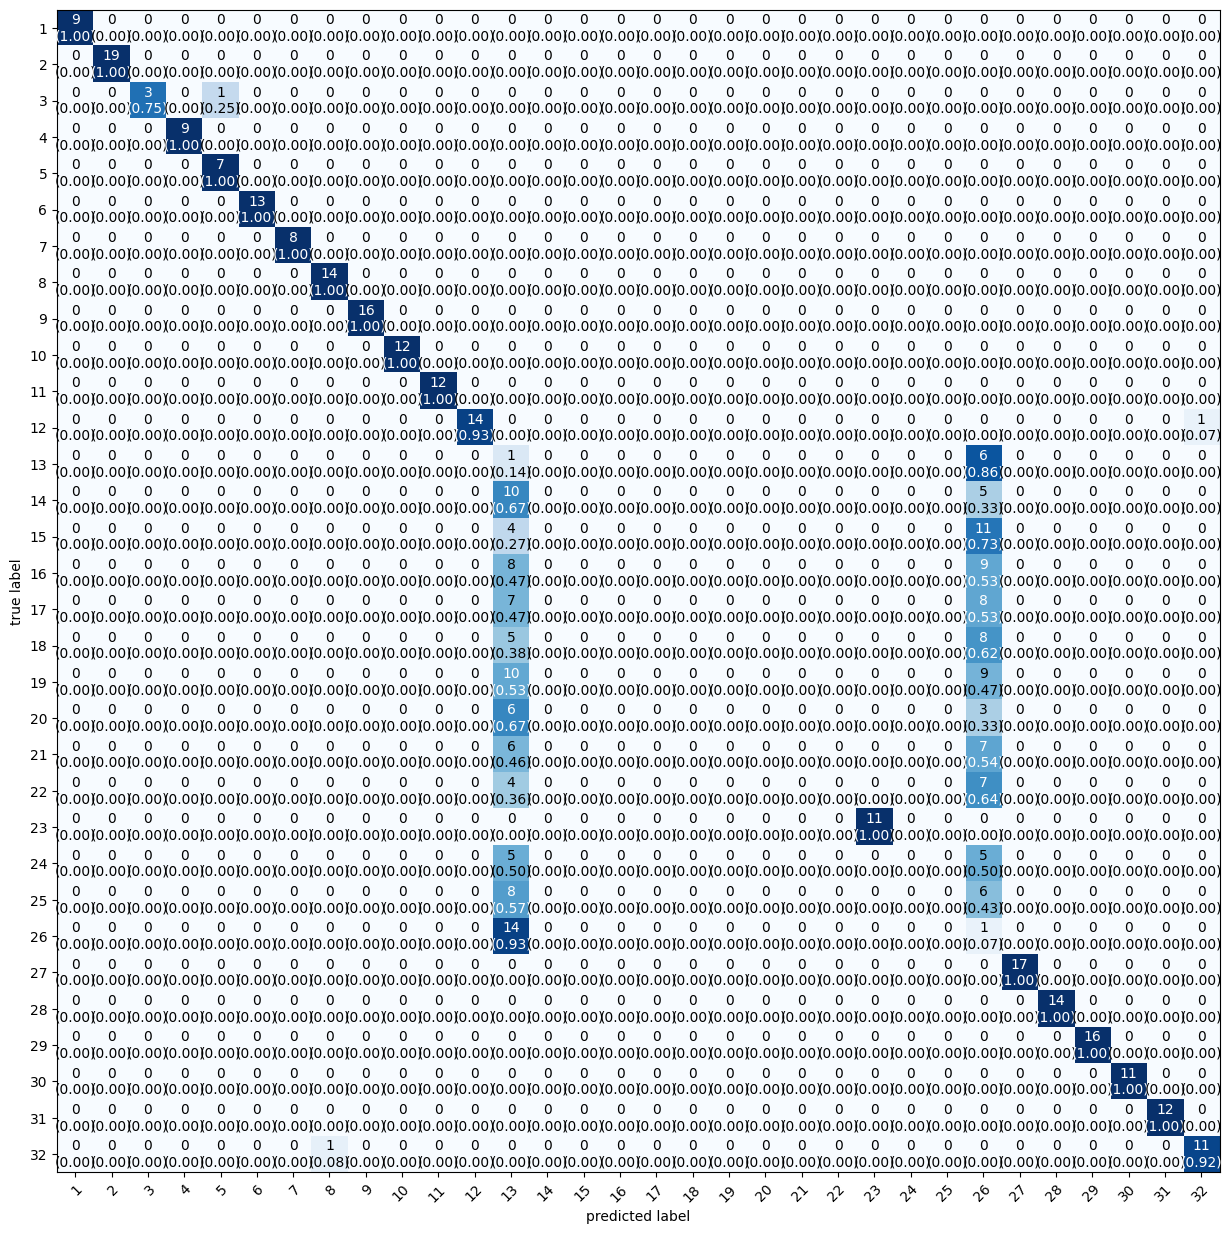

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(15,20),class_names = ["1","2","3","4","5","6","7","8",
                                                                "9","10","11","12","13","14",
                                                                "15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32"],
                      show_normed = True);


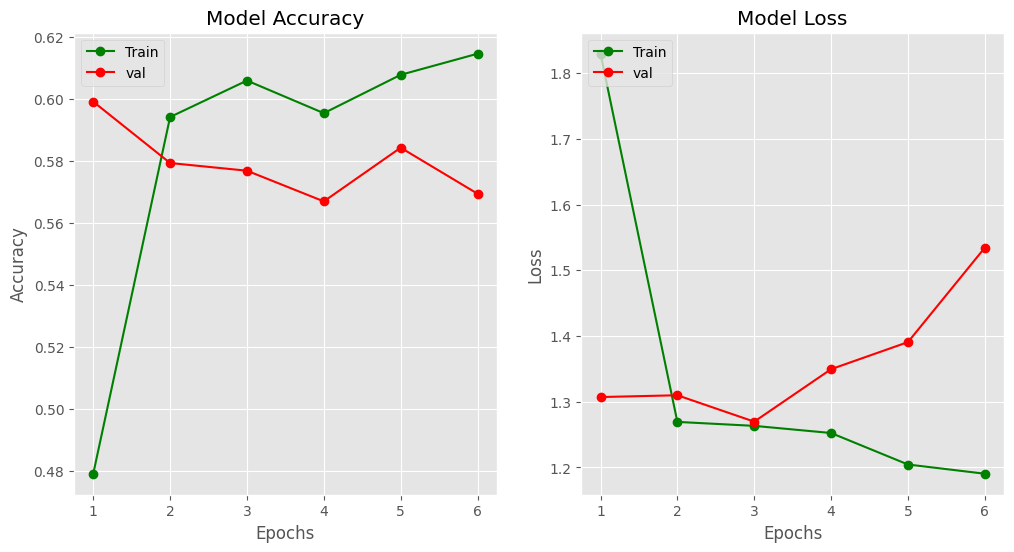

In [ ]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,7)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

Đoạn code trên sử dụng thư viện matplotlib để tạo ra một biểu đồ hiển thị các hình ảnh từ tập dữ liệu x_test và nhãn tương ứng y_test và y_pred.

Dòng plt.figure(figsize=(12,9)) thiết lập kích thước của hình vẽ là 12x9 inches.
Dòng plt.style.use("ggplot") thiết lập kiểu đồ thị là "ggplot".
Vòng lặp for i in range(10): sẽ chạy 10 lần để vẽ 10 hình ảnh.
Dòng sample = random.choice(range(len(x_test))) chọn ngẫu nhiên một mẫu từ tập dữ liệu x_test.
Dòng plt.subplot(2,5,i+1) tạo ra một ô con trong biểu đồ có kích thước 2 hàng x 5 cột và đặt ô con thứ i+1.
Dòng plt.subplots_adjust(hspace=0.3) điều chỉnh khoảng cách giữa các ô con theo chiều dọc.
Dòng plt.imshow(x_test[sample]) hiển thị hình ảnh từ mẫu được chọn.
Dòng plt.xlabel(f"Actual: {y_test[sample]}\n Predicted: {y_pred[sample]}") đặt nhãn cho hình ảnh hiển thị thông tin về nhãn thực tế (Actual) và nhãn dự đoán (Predicted).
Dòng plt.tight_layout() điều chỉnh khoảng cách giữa các ô con để chúng không chồng lên nhau.
Dòng plt.show() hiển thị biểu đồ.

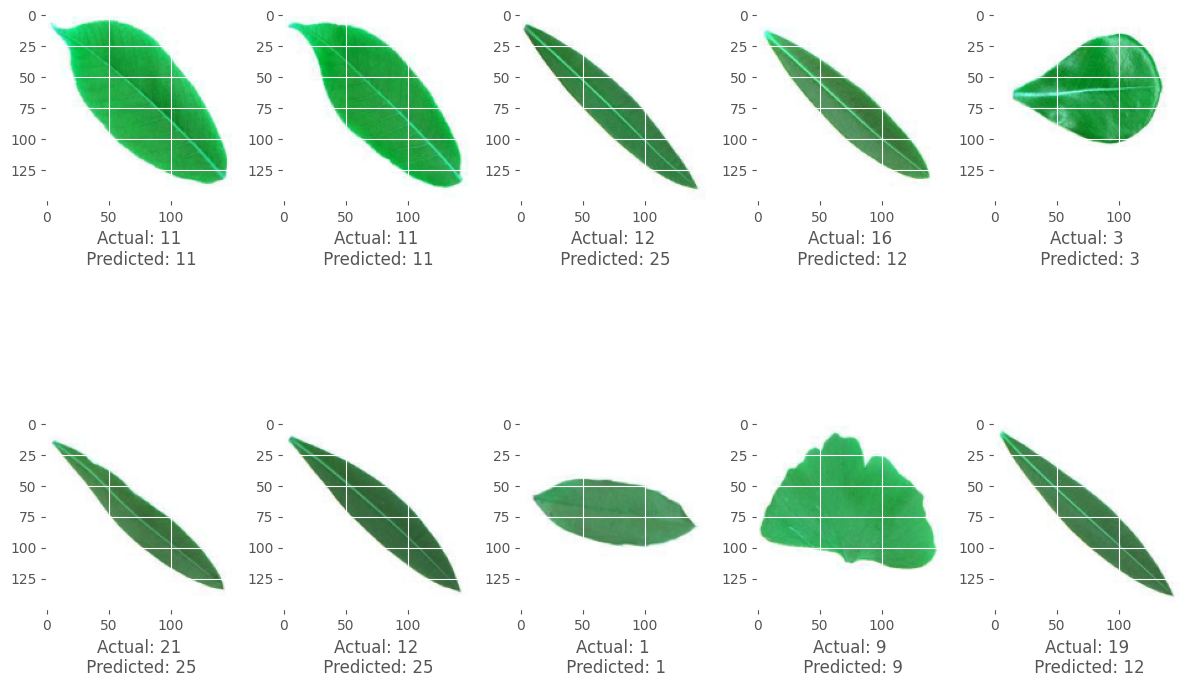

In [ ]:
plt.figure(figsize=(12,9))
plt.style.use("ggplot")
for i in range(10):
    sample = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(x_test[sample])
    plt.xlabel(f"Actual: {y_test[sample]}\n Predicted: {y_pred[sample]}")

plt.tight_layout()
plt.show()

search_image

In [ ]:
# import thu vien
import os
import tensorflow as tf

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import  Model

from PIL import Image
import pickle
import numpy as np

# Ham tao model
def get_extract_model():
    vgg16_model = VGG16(weights="imagenet")
    extract_model = Model(inputs=vgg16_model.inputs, outputs = vgg16_model.get_layer("fc1").output)
    return extract_model

# Ham tien xu ly, chuyen doi hinh anh thanh tensor
def image_preprocess(img):
    img = img.resize((224,224))
    img = img.convert("RGB")
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x



def extract_vector(model, image_path):
    print("Xu ly : ", image_path)
    img = Image.open(image_path)
    img_tensor = image_preprocess(img)

    # Trich dac trung
    vector = model.predict(img_tensor)[0]
    # Chuan hoa vector = chia chia L2 norm (tu google search)
    vector = vector / np.linalg.norm(vector)
    return vector



# Dinh nghia thu muc data

data_folder = "F:/AI/AI_lam_lai/Logo Branch/Dior"

# Khoi tao model
model = get_extract_model()

vectors1 = []
paths1 = []

for image_path in os.listdir(data_folder):
    # Noi full path
    image_path_full = os.path.join(data_folder, image_path)
    # Trich dac trung
    image_vector = extract_vector(model,image_path_full)
    # Add dac trung va full path vao list
    vectors1.append(image_vector)
    paths1.append(image_path_full)

# save vao file
vector_file = "vectors1.pkl"
path_file = "paths1.pkl"

pickle.dump(vectors1, open(vector_file, "wb"))
pickle.dump(paths1, open(path_file, "wb"))




Xu ly :  F:/AI/AI_lam_lai/Logo Branch/Dior\1.JPG
1/1 [==============================] - 1s 578ms/step
Xu ly :  F:/AI/AI_lam_lai/Logo Branch/Dior\10.jpg
1/1 [==============================] - 0s 224ms/step
Xu ly :  F:/AI/AI_lam_lai/Logo Branch/Dior\100.JPG
1/1 [==============================] - 0s 232ms/step
Xu ly :  F:/AI/AI_lam_lai/Logo Branch/Dior\11.jpg
1/1 [==============================] - 0s 195ms/step
Xu ly :  F:/AI/AI_lam_lai/Logo Branch/Dior\12.jpg
1/1 [==============================] - 0s 198ms/step
Xu ly :  F:/AI/AI_lam_lai/Logo Branch/Dior\13.JPG
1/1 [==============================] - 0s 203ms/step
Xu ly :  F:/AI/AI_lam_lai/Logo Branch/Dior\13.PNG
1/1 [==============================] - 0s 215ms/step
Xu ly :  F:/AI/AI_lam_lai/Logo Branch/Dior\14.JPG
1/1 [==============================] - 0s 212ms/step
Xu ly :  F:/AI/AI_lam_lai/Logo Branch/Dior\14.PNG
1/1 [==============================] - 0s 198ms/step
Xu ly :  F:/AI/AI_lam_lai/Logo Branch/Dior\15.JPG
1/1 [==================

Xu ly :  F:/AI/AI_lam_lai/test/21.jpg
1/1 [==============================] - 1s 938ms/step


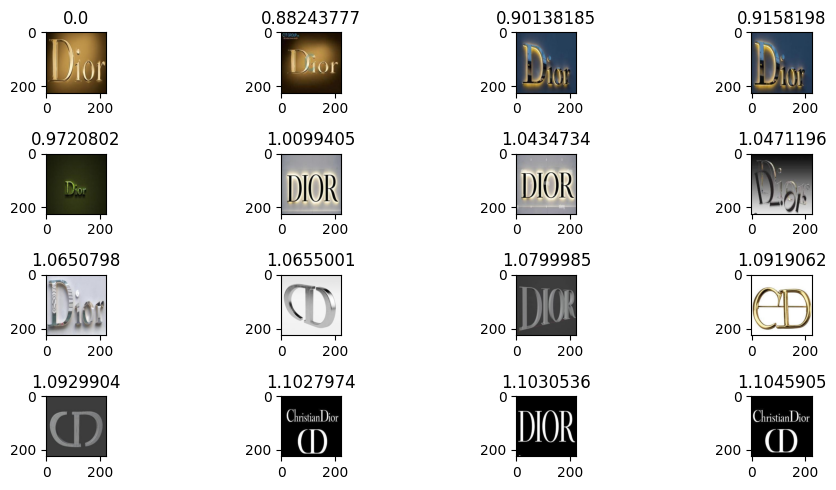

In [ ]:
import math
import os
import tensorflow as tf
from tensorflow import keras

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import  Model

from PIL import Image
import pickle
import numpy as np

# Ham tao model
def get_extract_model():
    vgg16_model = VGG16(weights="imagenet")
    extract_model = Model(inputs=vgg16_model.inputs, outputs = vgg16_model.get_layer("fc1").output)
    return extract_model

# Ham tien xu ly, chuyen doi hinh anh thanh tensor
def image_preprocess(img):
    img = img.resize((224,224))
    img = img.convert("RGB")
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def extract_vector(model, image_path):
    print("Xu ly : ", image_path)
    img = Image.open(image_path)
    img_tensor = image_preprocess(img)

    # Trich dac trung
    vector = model.predict(img_tensor)[0]
    # Chuan hoa vector = chia chia L2 norm (tu google search)
    vector = vector / np.linalg.norm(vector)
    return vector

# Dinh nghia anh can tim kiem
search_image="F:/AI/AI_lam_lai/test/21.jpg"


# Khoi tao model
model = get_extract_model()

# Trich dac trung anh search
search_vector = extract_vector(model, search_image)

# Load 4700 vector tu vectors.pkl ra bien
vectors = pickle.load(open("vectors1.pkl","rb"))
paths = pickle.load(open("paths1.pkl","rb"))

# Tinh khoang cach tu search_vector den tat ca cac vector
distance = np.linalg.norm(vectors - search_vector, axis=1)

# Sap xep va lay ra K vector co khoang cach ngan nhat
K = 16
ids = np.argsort(distance)[:K]

# Tao oputput
nearest_image = [(paths[id], distance[id]) for id in ids]

# Ve len man hinh cac anh gan nhat do
import matplotlib.pyplot as plt

axes = []
grid_size = int(math.sqrt(K))
fig = plt.figure(figsize=(10,5))


for id in range(K):
    draw_image = nearest_image[id]
    axes.append(fig.add_subplot(grid_size, grid_size, id+1))

    axes[-1].set_title(draw_image[1])
    plt.imshow(Image.open(draw_image[0]))

fig.tight_layout()
plt.show()